# Exploring Dandiset 000563: Allen Institute Openscope - Barcoding

**Version:** 0.250311.2145

**Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This Dandiset, titled "Allen Institute Openscope - Barcoding", contains data related to visual neuron responses to white noise flicker stimuli in mice.

The abstract states:
"Some visual neurons have been shown to respond to white noise flicker visual stimuli with high temporal precision, particularly retinal ganglion cells and LGN relay cells. Responses to white noise stimulation are useful for a variety of analyses, including information theoretic measures and generative models of precise spike timing. However the literature was lacking data on responses to white noise in cortical visual areas, or in the visual stream flowing through the superior colliculus.

This experiment used the OpenScope Neuropixels passive viewing protocol, and displayed visual stimuli modulated in time by a short, repeated white noise sequence. The visual stimulus was either a spatially uniform field whose luminance was modulated in time (Full Field Flicker), or a standing sinusoidal grating whose contrast was modulated in time (Static Gratings). Perhaps surprisingly, most cortical visual neurons responded well to full-field flicker white noise. To obtain large populations of neurons in subcortical areas, roughly half of the mice were recorded in a novel electrode configuration.

When white noise visual stimuli are presented repeatedly and the neural responses displayed as spike rasters, the rasters look remarkably like UPC codes or bar codes. The same bar-code-like patterns have been found in neurons recorded in different individual animals, and even neurons in different species. We speculated that these barcodes could be used as identifiers of discrete cell types. The Temporal Barcode Dataset provides \"barcodes\" for visually responsive neurons throughout the mouse brain, enabling a test of this hypothesis."

**Dandiset Link:** [https://dandiarchive.org/dandiset/000563/0.250311.2145](https://dandiarchive.org/dandiset/000563/0.250311.2145)

## Notebook Goals

This notebook aims to:
1. Demonstrate how to load the Dandiset metadata and list its assets using the DANDI API.
2. Show how to load a specific NWB (Neurodata Without Borders) file from the Dandiset.
3. Explore the metadata and structure of the loaded NWB file.
4. Illustrate how to access and visualize some of the data contained within the NWB file, such as eye tracking data and running speed.

## Required Packages

To run this notebook, you will need the following Python packages installed:
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `seaborn`

It is assumed that these packages are already installed in your Python environment.

## Loading the Dandiset using DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pynwb
import h5py
import remfile

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "000563"
dandiset_version = "0.250311.2145"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.asset_id})") # Corrected to asset.asset_id

Dandiset name: Allen Institute Openscope - Barcoding
Dandiset URL: https://dandiarchive.org/dandiset/000563/0.250311.2145

First 5 assets:


AttributeError: 'RemoteBlobAsset' object has no attribute 'asset_id'

## Loading an NWB File

We will now load one of the NWB files from the Dandiset. Specifically, we'll work with the file:
`sub-681446/sub-681446_ses-1290510496_ogen.nwb`

The URL for this asset is: `https://api.dandiarchive.org/api/assets/2f2ac304-83a3-4352-8612-5f34b68062a0/download/`

In [2]:
# Load the NWB file
nwb_file_url = "https://api.dandiarchive.org/api/assets/2f2ac304-83a3-4352-8612-5f34b68062a0/download/"
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file, mode='r') # Ensure read-only mode
io = pynwb.NWBHDF5IO(file=h5_file, mode='r', load_namespaces=True) # Ensure read-only mode and load namespaces
nwb = io.read()

print(f"Successfully loaded NWB file: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Successfully loaded NWB file: 1290510496
Session description: Data and metadata for an Ecephys session
Session start time: 2023-08-16 00:00:00-07:00


## Exploring the NWB File Contents

Let's look at some of the metadata and data structures within the loaded NWB file.

You can explore this NWB file interactively on Neurosift:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f2ac304-83a3-4352-8612-5f34b68062a0/download/&dandisetId=000563&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f2ac304-83a3-4352-8612-5f34b68062a0/download/&dandisetId=000563&dandisetVersion=draft)

### Subject Information

In [3]:
subject = nwb.subject
print(f"Subject ID: {subject.subject_id}")
print(f"Species: {subject.species}")
print(f"Sex: {subject.sex}")
print(f"Age: {subject.age}")
print(f"Genotype: {subject.genotype}")
print(f"Strain: {subject.strain}")

Subject ID: 681446
Species: Mus musculus
Sex: M
Age: P112D
Genotype: Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
Strain: Transgenic


### Acquisition Data
The NWB file contains several types of acquired data. We can list them:

```
nwb.acquisition
```

From the `nwb-file-info` output, we know this includes:
- `EyeTracking`: Contains EllipseSeries for corneal reflection, eye, and pupil tracking.
- `raw_running_wheel_rotation`: TimeSeries data for running wheel rotation.
- `running_wheel_signal_voltage`: TimeSeries data for running wheel signal voltage.
- `running_wheel_supply_voltage`: TimeSeries data for running wheel supply voltage.

Let's visualize some of this data.

#### Eye Tracking Data

We will plot a short segment of the pupil area over time.

Plotting the first 1000 data points for pupil area.


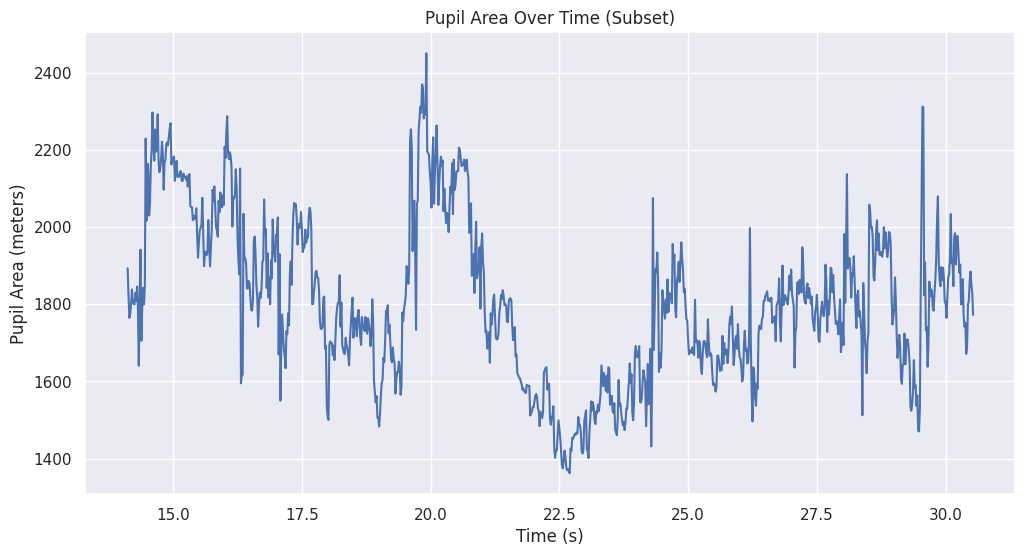

In [4]:
sns.set_theme() # Apply seaborn styling

pupil_tracking = nwb.acquisition['EyeTracking'].spatial_series['pupil_tracking']
pupil_area_data = pupil_tracking.area
pupil_timestamps = pupil_tracking.timestamps

# Plot a subset of the pupil area data to avoid excessive loading/plotting time
num_points_to_plot = 1000
if len(pupil_timestamps) > num_points_to_plot:
    time_subset = pupil_timestamps[:num_points_to_plot]
    area_subset = pupil_area_data[:num_points_to_plot]
    print(f"Plotting the first {num_points_to_plot} data points for pupil area.")
else:
    time_subset = pupil_timestamps[:]
    area_subset = pupil_area_data[:]
    print("Plotting all available pupil area data points.")


plt.figure(figsize=(12, 6))
plt.plot(time_subset, area_subset)
plt.xlabel("Time (s)")
plt.ylabel(f"Pupil Area ({pupil_tracking.unit})") # Assuming pupil_tracking.unit is appropriate for area
plt.title("Pupil Area Over Time (Subset)")
plt.grid(True)
plt.show()

#### Running Wheel Data

Let's visualize a segment of the raw running wheel rotation.

Plotting the first 1000 data points for running wheel rotation.


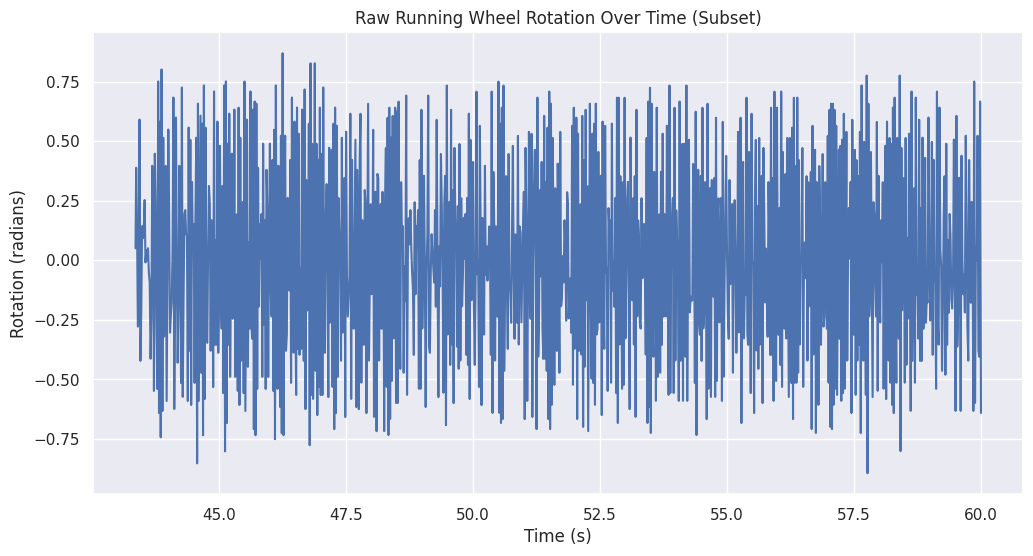

In [5]:
running_wheel_data = nwb.acquisition['raw_running_wheel_rotation'].data
running_wheel_timestamps = nwb.acquisition['raw_running_wheel_rotation'].timestamps

# Plot a subset of the running wheel data
num_points_to_plot_run = 1000
if len(running_wheel_timestamps) > num_points_to_plot_run:
    time_subset_run = running_wheel_timestamps[:num_points_to_plot_run]
    data_subset_run = running_wheel_data[:num_points_to_plot_run]
    print(f"Plotting the first {num_points_to_plot_run} data points for running wheel rotation.")
else:
    time_subset_run = running_wheel_timestamps[:]
    data_subset_run = running_wheel_data[:]
    print("Plotting all available running wheel rotation data points.")

plt.figure(figsize=(12, 6))
plt.plot(time_subset_run, data_subset_run)
plt.xlabel("Time (s)")
plt.ylabel(f"Rotation ({nwb.acquisition['raw_running_wheel_rotation'].unit})")
plt.title("Raw Running Wheel Rotation Over Time (Subset)")
plt.grid(True)
plt.show()

### Processing Modules
The NWB file also contains processing modules.

```
nwb.processing
```

From the `nwb-file-info` output, this includes:
- `optotagging`: Contains OptogeneticSeries data and optogenetic stimulation time intervals.
- `running`: Contains processed running speed data.
- `stimulus`: Contains stimulus presentation timestamps.

#### Processed Running Speed

Let's plot a segment of the processed running speed.

Plotting the first 1000 data points for processed running speed.


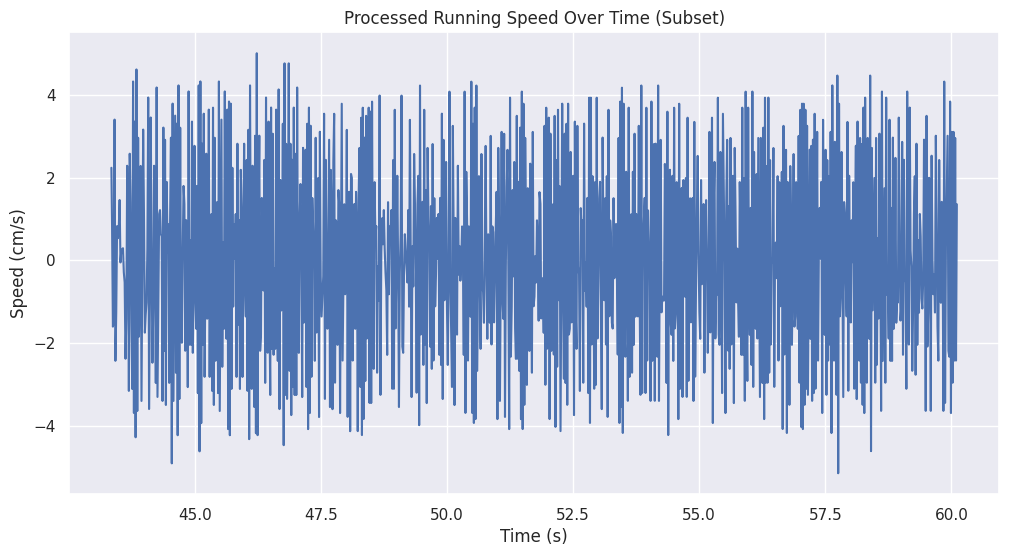

In [6]:
running_speed_series = nwb.processing['running']['running_speed']
running_speed_data = running_speed_series.data
running_speed_timestamps = running_speed_series.timestamps

# Plot a subset of the running speed data
num_points_to_plot_rs = 1000
if len(running_speed_timestamps) > num_points_to_plot_rs:
    time_subset_rs = running_speed_timestamps[:num_points_to_plot_rs]
    data_subset_rs = running_speed_data[:num_points_to_plot_rs]
    print(f"Plotting the first {num_points_to_plot_rs} data points for processed running speed.")
else:
    time_subset_rs = running_speed_timestamps[:]
    data_subset_rs = running_speed_data[:]
    print("Plotting all available processed running speed data points.")

plt.figure(figsize=(12, 6))
plt.plot(time_subset_rs, data_subset_rs)
plt.xlabel("Time (s)")
plt.ylabel(f"Speed ({running_speed_series.unit})")
plt.title("Processed Running Speed Over Time (Subset)")
plt.grid(True)
plt.show()

### Stimulus Presentation Information

The NWB file contains detailed information about stimulus presentations in `nwb.intervals`.
For example, `nwb.intervals['RepeatFFF_presentations']` is a `TimeIntervals` table.

Let's inspect the column names of one such table.

In [7]:
if 'RepeatFFF_presentations' in nwb.intervals:
    repeat_fff_presentations = nwb.intervals['RepeatFFF_presentations']
    print("Columns in 'RepeatFFF_presentations':")
    # If it's a DynamicTable or TimeIntervals, we can get colnames
    if hasattr(repeat_fff_presentations, 'colnames'):
        print(list(repeat_fff_presentations.colnames))
    else: # Older pynwb versions might store columns differently or it might be a simpler structure
        print_df = repeat_fff_presentations.to_dataframe()
        print(list(print_df.columns))

    # Display the first few rows as a DataFrame
    print("\nFirst 5 rows of 'RepeatFFF_presentations':")
    try:
        df_repeat_fff = repeat_fff_presentations.to_dataframe()
        print(df_repeat_fff.head())
    except Exception as e:
        print(f"Could not convert 'RepeatFFF_presentations' to DataFrame: {e}")
else:
    print("'RepeatFFF_presentations' not found in NWB intervals.")

Columns in 'RepeatFFF_presentations':
['start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'index_repeat', 'contrast', 'mask', 'opacity', 'orientation', 'phase', 'spatial_frequency', 'size', 'units', 'stimulus_index', 'color', 'tags', 'timeseries']

First 5 rows of 'RepeatFFF_presentations':


    start_time  stop_time stimulus_name  stimulus_block  index_repeat  \
id                                                                      
0    163.46116  163.47784     RepeatFFF             1.0           0.0   
1    163.47784  163.49453     RepeatFFF             1.0           0.0   
2    163.49453  163.51118     RepeatFFF             1.0           0.0   
3    163.51118  163.52780     RepeatFFF             1.0           0.0   
4    163.52780  163.54457     RepeatFFF             1.0           0.0   

    contrast  mask  opacity  orientation       phase spatial_frequency  \
id                                                                       
0        1.0  None      1.0          0.0  [0.0, 0.0]        [0.0, 0.0]   
1        1.0  None      1.0          0.0  [0.0, 0.0]        [0.0, 0.0]   
2        1.0  None      1.0          0.0  [0.0, 0.0]        [0.0, 0.0]   
3        1.0  None      1.0          0.0  [0.0, 0.0]        [0.0, 0.0]   
4        1.0  None      1.0          0.0  [0

### Electrode Information

The file contains information about the electrodes used.
```
nwb.electrodes
```
This is a `DynamicTable` that we can convert to a pandas DataFrame for easier inspection.

In [8]:
if nwb.electrodes is not None:
    electrodes_df = nwb.electrodes.to_dataframe()
    print("Electrode Information (first 5 rows):")
    print(electrodes_df.head())
    print(f"\nTotal number of electrodes: {len(electrodes_df)}")
else:
    print("No electrode information found in this NWB file.")

Electrode Information (first 5 rows):
   location                                              group group_name  \
id                                                                          
0       APN  probeA abc.EcephysElectrodeGroup at 0x13241576...     probeA   
1       APN  probeA abc.EcephysElectrodeGroup at 0x13241576...     probeA   
2       APN  probeA abc.EcephysElectrodeGroup at 0x13241576...     probeA   
3       APN  probeA abc.EcephysElectrodeGroup at 0x13241576...     probeA   
4       APN  probeA abc.EcephysElectrodeGroup at 0x13241576...     probeA   

    probe_vertical_position  probe_horizontal_position  probe_id  local_index  \
id                                                                              
0                        20                         43         0            0   
1                        20                         11         0            1   
2                        40                         59         0            2   
3                

### Units (Spike Data)

This NWB file also contains sorted spike data (`nwb.units`), which includes spike times for different recorded units.

```
nwb.units
```
This is also a `DynamicTable`.

In [9]:
if nwb.units is not None:
    units_df = nwb.units.to_dataframe()
    print("Units Information (first 5 rows):")
    print(units_df.head())
    print(f"\nTotal number of units: {len(units_df)}")

    # Let's plot the spike times for the first few units as a raster plot
    # To avoid excessive data loading, we'll select a few units and a time window.
    num_units_to_plot = 5
    if len(units_df) >= num_units_to_plot:
        plt.figure(figsize=(15, 8))
        event_data = []
        for i in range(num_units_to_plot):
            unit_id = units_df.index[i] # Actual unit ID
            spike_times = nwb.units['spike_times'][i] # Access spike times by index
            # Filter spike times for a specific window, e.g., first 10 seconds
            time_window_end = 10
            spike_times_in_window = spike_times[spike_times &lt; time_window_end]
            event_data.append(spike_times_in_window)

        colors = plt.cm.viridis(np.linspace(0, 1, num_units_to_plot))
        plt.eventplot(event_data, colors=colors, linelengths=0.75)
        plt.yticks(np.arange(num_units_to_plot), units_df.index[:num_units_to_plot].astype(str)) # Use actual unit IDs for y-ticks
        plt.xlabel("Time (s)")
        plt.ylabel("Unit ID")
        plt.title(f"Spike Raster for First {num_units_to_plot} Units (First {time_window_end}s)")
        plt.grid(True, axis='x')
        plt.show()
    else:
        print("Not enough units to create a raster plot for 5 units.")
else:
    print("No units (spike data) found in this NWB file.")

SyntaxError: invalid syntax (3919577726.py, line 18)

## Summary and Future Directions

This notebook demonstrated how to:
- Connect to the DANDI archive and retrieve Dandiset metadata and asset lists.
- Load a specific NWB file from Dandiset 000563 using its URL.
- Access and display basic metadata from the NWB file, including subject information.
- Explore and visualize exemplar data from the `acquisition` group (e.g., pupil area, running wheel rotation).
- Explore and visualize exemplar data from the `processing` modules (e.g., processed running speed).
- Inspect stimulus presentation information stored in `nwb.intervals`.
- View electrode and unit (spike data) tables.
- Create a simple spike raster plot for a subset of units.

### Possible Future Directions:

1.  **Detailed Stimulus-Response Analysis:** Correlate neural activity (spike times from `nwb.units`) with specific stimulus presentations detailed in `nwb.intervals` (e.g., 'RepeatFFF_presentations', 'UniqueFFF_presentations'). This could involve creating peri-stimulus time histograms (PSTHs).
2.  **Behavioral Correlations:** Investigate how neural activity patterns change with behavioral variables like running speed or pupil diameter.
3.  **Cross-Session/Cross-Animal Comparisons:** If multiple NWB files represent different sessions or animals, one could extend this analysis to compare neural responses or behavioral patterns across them. This would require loading and processing multiple NWB files.
4.  **Exploring `ecephys` NWB Files:** The Dandiset also contains `_ecephys.nwb` files which are likely to hold the raw electrophysiology data (e.g., LFP, raw voltage traces). This notebook focused on an `_ogen.nwb` file. Exploring the `_ecephys.nwb` files would involve different data types (e.g., `ElectricalSeries`).
5.  **Advanced Visualizations:** Develop more sophisticated visualizations, such as heatmaps of neural activity across populations or detailed plots of eye movement trajectories.

This notebook serves as a starting point for exploring the rich dataset available in Dandiset 000563. Users are encouraged to adapt and expand upon these examples for their own research questions.

Remember to close the file if you are done with it and managing resources explicitly, though for this notebook's scope, automatic cleanup upon script completion is often sufficient.
```python
# io.close() # Important for resource management in longer scripts or applications
```